<h1> Link Partitioning by Partioning Around Medoids with Clarance Heuristic </h1>
<br/>
Distance function: Commute Distance

In [41]:
import numpy as np
import random
random.seed = 108
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline

In [42]:
!pwd

/home/latna/aponom/clustering/Scripts


In [43]:
!ls /home/latna/aponom/clustering/Scripts/../Results/

adjnoun_ACM_pmp_2	      lp_kmd_cm_polbooks
COPRA_adjnoun		      lp_kmd_cm_school_friendship
COPRA_football		      lp_pmp_acm_adjnoun
COPRA_karate		      lp_pmp_acm_karate
COPRA_polbooks		      lp_pmp_acm_polbooks
COPRA_school_friendship       lp_pmp_acm_school_friendship
GCE_adjnoun		      lp_pmp_cm_adjnoun
GCE_football		      lp_pmp_cm_karate
GCE_karate		      lp_pmp_cm_polbooks
GCE_polbooks		      lp_pmp_cm_school_friendship
GCE_school_friendship	      OSLOM2_adjnoun
Generalize Degre	      OSLOM2-adjnoun
lp_kdm_acm_school_friendship  OSLOM2_football
lp_kmd_acm_adjnoun	      OSLOM2_karate
lp_kmd_acm_football	      OSLOM2-karate
lp_kmd_acm_karate	      OSLOM2_polbooks
lp_kmd_acm_polbooks	      OSLOM2_school_friendship
lp_kmd_acm_school_friendship  school-2_ACM_kmd_7
lp_kmd_cm_adjnoun	      school-2_ACM_pmp_7
lp_kmd_cm_football	      school-2_ACM_pmp_9
lp_kmd_cm_karate


In [44]:
!java -jar ../my_git/out/artifacts/Clustering_jar/Clustering.jar

Error: Unable to access jarfile ../my_git/out/artifacts/Clustering_jar/Clustering.jar


In [51]:
def lp_experiment(clustersNumber, algorithm, distance, inputFile, groundTruth, params = {}, vertexNumerationShift=0, benchmarkFormat=False):
    datasetName = inputFile.split('/')[-2]
    sufix = inputFile.split('/')[-1].split('.')[0]
    outputDir = "../Results/lp_{}_{}_{}".format(algorithm, distance, datasetName)
    outputFile = outputDir +'/' +"pmp_{3}_{2}_{0}_{1}.dat".format(algorithm, clustersNumber, distance.upper(), sufix)
    print("Output dir name: {}".format(outputDir) )
    print("Output file name: {}".format(outputFile) )
    all_results = {}
    bestParam = "not found"
    nmi_best = 0;
    param_list = list(generate_params(params))
    for param in tqdm(param_list):
        if benchmarkFormat:
            tmp=!java -jar ../lpam/out/artifacts/Clustering_jar/Clustering.jar -b -a {algorithm} -o {outputDir} -i {inputFile} -k {clustersNumber} -d {distance} {param}     
            tmpFile = outputFile
        else:
            tmp=!java -jar ../lpam/out/artifacts/Clustering_jar/Clustering.jar -a {algorithm} -o {outputDir} -i {inputFile} -k {clustersNumber} -d {distance} {param}
            lines=[]
            with open(outputFile) as f:
                lines = f.readlines()    
            tmpFile="tmpFile.dat"
            with open(tmpFile, 'w') as the_file:
                for line in lines:
                    the_file.write(" ".join([str(int(a)+vertexNumerationShift) for a in line.split()]) + "\n")

        output=!../Overlapping-NMI/onmi {groundTruth} {tmpFile}
        nmi=float(output[0].split()[1])
        all_results[param] = nmi
        if nmi >  nmi_best:
            bestParam = param
            nmi_best = nmi
    #restorign solution for the best parameters           
    if benchmarkFormat:
        tmp=!java -jar ../lpam/out/artifacts/Clustering_jar/Clustering.jar -b -a {algorithm} -o {outputDir} -i {inputFile} -k {clustersNumber} -d {distance} {bestParam}
        tmpFile = outputFile
    else:
        tmp=!java -jar ../lpam/out/artifacts/Clustering_jar/Clustering.jar -a {algorithm} -o {outputDir} -i {inputFile} -k {clustersNumber} -d {distance} {bestParam}
        lines=[]
        with open(outputFile) as f:
            lines = f.readlines()    
        tmpFile="tmpFile.dat"
        with open(tmpFile, 'w') as the_file:
            for line in lines:
                the_file.write(" ".join([str(int(a)+vertexNumerationShift) for a in line.split()]) + "\n")

    print("Best ONMI: {} params: '{}'".format(nmi_best, bestParam) )
    return all_results

In [52]:
def generate_params(params):
    keys = list(params.keys())
    if len(keys) == 1:
        for value in params[keys[0]]:
            yield ( keys[0] + " " + str(value) )        
    if len( keys ) > 1:
        for value in params[keys[0]]:
            for remain_params in generate_params({k:params[k] for k in keys[1:]}):
                yield ( keys[0] + " " + str(value) + " " + remain_params )

In [53]:
def plot_all_params(algorithm, dataset, all_results ):
    xdata=[]
    ydata=[]
    df = pd.DataFrame()
    for param, nmi in all_results.items():
        splited = param.split()
        xdata.append(float(splited[1]))
        ydata.append(nmi)
        df = df.append({'x': float(splited[1]), 'y': nmi}, ignore_index=True)

    plt.plot(xdata, ydata, 'C3', zorder=1, lw=3)
    # ax = plt.axes(projection='3d')
    plt.scatter(xdata, ydata,s=70,zorder=2)
    plt.xlabel('threshold')
    plt.ylabel('nmi value');
    plt.title('Algorithm: {}\nDataset: {}'.format(algorithm, dataset));
    plt.show()

# School friendship network #

In [54]:
params={}
params["-t"] = np.arange(0.05, 1.0, 0.05)

In [55]:
all_results = lp_experiment(clustersNumber=7, 
              algorithm = "kmd",
              distance = "cm",
              inputFile =  "../datasets/school_friendship/school-2.gml", 
              groundTruth = "../datasets/school_friendship/truth-school.dat", 
              params = params, 
              vertexNumerationShift=-1, 
              benchmarkFormat=False)

Output dir name: ../Results/lp_kmd_cm_school_friendship
Output file name: ../Results/lp_kmd_cm_school_friendship/pmp_school-2_CM_kmd_7.dat



Best ONMI: 0.577798 params: '-t 0.7000000000000001'


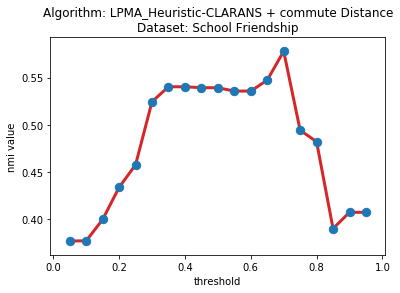

In [56]:
plot_all_params(algorithm = "LPMA_Heuristic-CLARANS + commute Distance", dataset = "School Friendship", all_results = all_results)

## Clustering results for School Frienship Netwrok with the best parameters ##

![school-2_ACM_kmd_7_out](../final_pictures/school-2_CM_kmd_7_out.png)

# Karate Club #

In [57]:
params={}
params["-t"] = np.arange(0.05, 1.0, 0.05)
all_results = lp_experiment(clustersNumber=2, 
              algorithm = "kmd",
              distance = "cm",
              inputFile =  "../datasets/karate/karate.gml", 
              groundTruth = "../datasets/karate/truth_karate.dat", 
              params = params, 
              vertexNumerationShift=0, 
              benchmarkFormat=False)

Output dir name: ../Results/lp_kmd_cm_karate
Output file name: ../Results/lp_kmd_cm_karate/pmp_karate_CM_kmd_2.dat



Best ONMI: 0.91796 params: '-t 0.45'


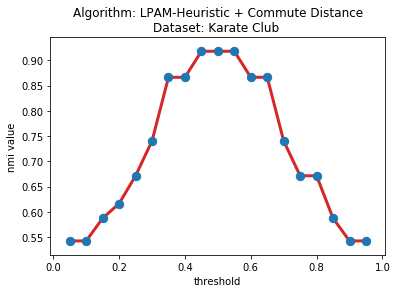

In [58]:
plot_all_params(algorithm = "LPAM-Heuristic + Commute Distance", dataset = "Karate Club ", all_results = all_results)

![karate_ACM_kmd_2_out](../final_pictures/karate_CM_kmd_2_out.png)

# American Football League c = 12#

In [59]:
params={}
params["-t"] = np.arange(0.05, 1.0, 0.05)
all_results = lp_experiment(clustersNumber=12, 
              algorithm = "kmd",
              distance = "cm",
              inputFile =  "../datasets/football/footballTSEinput.gml", 
              groundTruth = "../datasets/football/truth_footballTSEinput.dat", 
              params = params, 
              vertexNumerationShift=-1, 
              benchmarkFormat=False)

Output dir name: ../Results/lp_kmd_cm_football
Output file name: ../Results/lp_kmd_cm_football/pmp_footballTSEinput_CM_kmd_12.dat



Best ONMI: 0.71194 params: '-t 0.5'


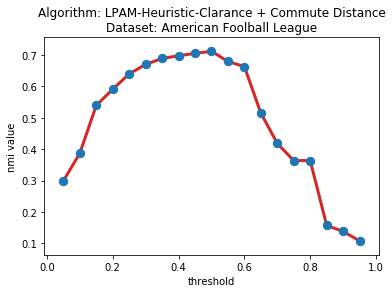

In [60]:
plot_all_params(algorithm = "LPAM-Heuristic-Clarance + Commute Distance", dataset = "American Foolball League", all_results = all_results)

### Americal Football League  [onmi: 0.71194; thresould: 0.5]

![American Football Club](../final_pictures/footballTSEinput_CM_kmd_12_out.png)

# Adj-noun#

In [61]:
params={}
params["-t"] = np.arange(0.05, 1.0, 0.05)
all_results = lp_experiment(clustersNumber=2, 
              algorithm = "kmd",
              distance = "cm",
              inputFile =  "../datasets/adjnoun/adjnoun.dat", 
              groundTruth = "../datasets/adjnoun/truth_adjnoun.dat", 
              params = params, 
              vertexNumerationShift=0, 
              benchmarkFormat=True)

Output dir name: ../Results/lp_kmd_cm_adjnoun
Output file name: ../Results/lp_kmd_cm_adjnoun/pmp_adjnoun_CM_kmd_2.dat



Best ONMI: 0.00953164 params: '-t 0.05'


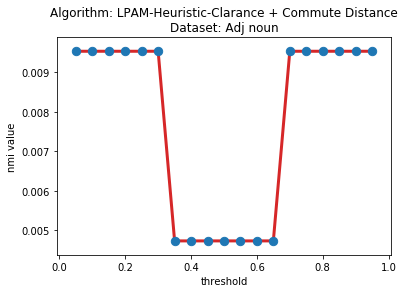

In [62]:
plot_all_params(algorithm = "LPAM-Heuristic-Clarance + Commute Distance", dataset = "Adj noun", all_results = all_results)

### Adj-noun [ onmi: 0.00953164; thresould: 0.05 ] 

![adjnoun_ACM_kmd_2](../final_pictures/adjnoun_CM_pmp_2_out.png)

# Politics Books #

In [63]:
params={}
params["-t"] = np.arange(0.05, 1.0, 0.05)
all_results = lp_experiment(clustersNumber=2, 
              algorithm = "kmd",
              distance = "cm",
              inputFile = "../datasets/polbooks/polbooks.dat",
              groundTruth = "../datasets/polbooks/truth_polbooks.dat", 
              params = params, 
              vertexNumerationShift=0, 
              benchmarkFormat=True)

Output dir name: ../Results/lp_kmd_cm_polbooks
Output file name: ../Results/lp_kmd_cm_polbooks/pmp_polbooks_CM_kmd_2.dat



Best ONMI: 0.440109 params: '-t 0.7000000000000001'


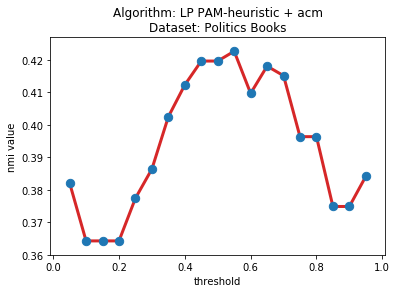

In [148]:
plot_all_params(algorithm = "LPAM-Heuristic-Clarance + Commute Distance", dataset = "Politics Books", all_results = all_results)

![polbooks_ACM_kmd_2_out](../final_pictures/polbooks_CM_kmd_2_out.png)